## Pregunta 5:
### ¿Los niveles educativos más bajos se asocian con una mayor proporción de violencia física y una menor representación relativa en los registros de divorcio?

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df_div = pd.read_csv("../files/divorcios_limpio1.csv", sep=",", dtype=str)
df_vio = pd.read_csv("../files/violencia_intrafamiliar_limpio1.csv", sep=",", dtype=str)

In [28]:
#1. Escolaridad Víctima
df_vio['VIC_ESCOLARIDAD'] = df_vio['VIC_ESCOLARIDAD'].astype(str).str.upper().str.strip()

df_vio['VIC_ESCOLARIDAD'] = df_vio['VIC_ESCOLARIDAD'].replace(
    r'^\d+(\.0)?$',
    'NO INDICA',
    regex=True
)

#Mapeo
def clasificar_educ(texto):
    if pd.isna(texto):
        return None
    
    texto = texto.upper()
    
    if 'NO INDICA' in texto or 'IGNORADO' in texto:
        return None
    elif 'NINGUNA' in texto:
        return 0
    elif 'PREPRIMARIA' in texto:
        return 1
    elif 'PRIMARIA' in texto:
        return 2
    elif 'BÁSICO' in texto or 'SECUNDARIA' in texto:
        return 3
    elif 'DIVERSIFICADO' in texto:
        return 4
    elif 'UNIVERSITARIO' in texto:
        return 5
    else:
        return None

df_vio['ESC_VIC_NUM'] = df_vio['VIC_ESCOLARIDAD'].apply(clasificar_educ)

#Limpia Tipagre
df_vio['TIPAGRE'] = df_vio['TIPAGRE'].astype(str).str.upper().str.strip()

df_vio['TIPAGRE'] = df_vio['TIPAGRE'].replace(
    r'^\d+(\.0)?$',
    'NO INDICA',
    regex=True
)


In [35]:
def clasificar_principal(x):
    if 'FSI' in x:
        return 'FSICA'
    elif 'PSIC' in x:
        return 'PSICOLGICA'
    elif 'PATRIM' in x:
        return 'PATRIMONIAL'
    elif 'SEXUAL' in x:
        return 'SEXUAL'
    else:
        return 'NO INDICA'

df_vio['TIPO_PRINCIPAL'] = df_vio['TIPAGRE'].apply(clasificar_principal)
df_vio['TIPO_PRINCIPAL'].value_counts(normalize=True) * 100

#df_vio['TIPAGRE'].value_counts()

TIPO_PRINCIPAL
FSICA          42.677075
NO INDICA      29.612940
PSICOLGICA     26.672011
PATRIMONIAL     0.830942
SEXUAL          0.207032
Name: proportion, dtype: float64

In [42]:
df_vio['TIPAGRE'] = (
    df_vio['TIPAGRE']
    .astype(str)
    .str.upper()
    .str.strip()
)

df_vio['VIOL_FISICA'] = df_vio['TIPAGRE'].str.contains('FSI', na=False).astype(int)
df_vio['VIOL_PSICO'] = df_vio['TIPAGRE'].str.contains('PSIC', na=False).astype(int)
df_vio['VIOL_PATRIMONIAL'] = df_vio['TIPAGRE'].str.contains('PATRIM', na=False).astype(int)
df_vio['VIOL_SEXUAL'] = df_vio['TIPAGRE'].str.contains('SEXUAL', na=False).astype(int)


In [43]:
#Cruce nivel educativo

tabla_tipos = (
    df_vio.groupby('ESC_VIC_NUM')[
        ['VIOL_FISICA','VIOL_PSICO','VIOL_PATRIMONIAL','VIOL_SEXUAL']
    ].mean()
)

tabla_tipos


,VIOL_FISICA,VIOL_PSICO,VIOL_PATRIMONIAL,VIOL_SEXUAL
ESC_VIC_NUM,,,,
0.0,0.630744,0.858608,0.148857,0.024696
2.0,0.662127,0.857512,0.151555,0.030481
4.0,0.640887,0.864537,0.161047,0.031950
5.0,0.654860,0.873970,0.168863,0.029654


In [44]:
#Preparación datos para análisis

#Convertir escolaridad a escala numérica
map_educ = {
    'NINGUNO': 0,
    'PREPRIMARIA': 1,
    'PRIMARIA': 2,
    'SECUNDARIA': 3,
    'DIVERSIFICADO': 4,
    'UNIVERSITARIO': 5,
    'BÁSICO': 6,
    'PRIMARIA ADULTOS': 7
}

df_div['ESCOLARIDAD_HOMBRE_NOMBRE'] = df_div['ESCOLARIDAD_HOMBRE_NOMBRE'].str.upper()
df_div['ESCOLARIDAD_MUJER_NOMBRE'] = df_div['ESCOLARIDAD_MUJER_NOMBRE'].str.upper()

df_div['ESC_HOM_NUM'] = df_div['ESCOLARIDAD_HOMBRE_NOMBRE'].map(map_educ)
df_div['ESC_MUJ_NUM'] = df_div['ESCOLARIDAD_MUJER_NOMBRE'].map(map_educ)

df_div['ESC_PROM_NUM'] = df_div[['ESC_HOM_NUM','ESC_MUJ_NUM']].mean(axis=1)


In [45]:
#Agrupar divorcios por nivel educativo promedio
tabla_div_educ = (
    df_div.groupby('ESC_PROM_NUM')
    .size()
)

tabla_div_educ_pct = (
    tabla_div_educ / tabla_div_educ.sum() * 100
).round(2)

tabla_div_educ_pct


ESC_PROM_NUM
1.0    21.75
1.5     3.87
2.0    10.46
2.5     3.02
3.0     4.50
3.5     1.67
4.0    28.44
4.5     0.37
5.0     7.55
5.5     6.27
6.0     6.24
6.5     0.60
7.0     5.27
dtype: float64

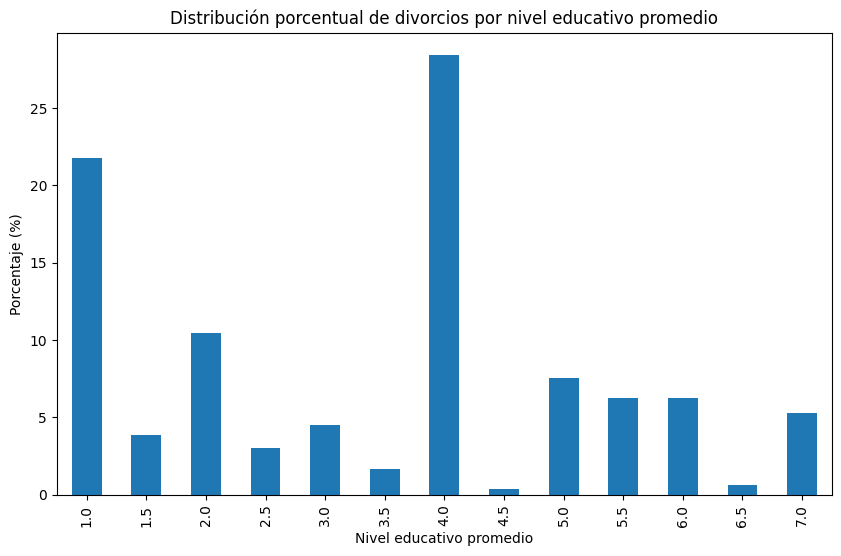

In [48]:
#Gráfica
plt.figure(figsize=(10, 6))
tabla_div_educ_pct.plot(kind='bar')
plt.title("Distribución porcentual de divorcios por nivel educativo promedio")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Nivel educativo promedio")
plt.show()